<a href="https://colab.research.google.com/github/laresamdeola/r-projects/blob/main/Building_a_Multiple_Linear_Regression_Model_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the dataset

dataset = read.csv("50_Startups.csv")

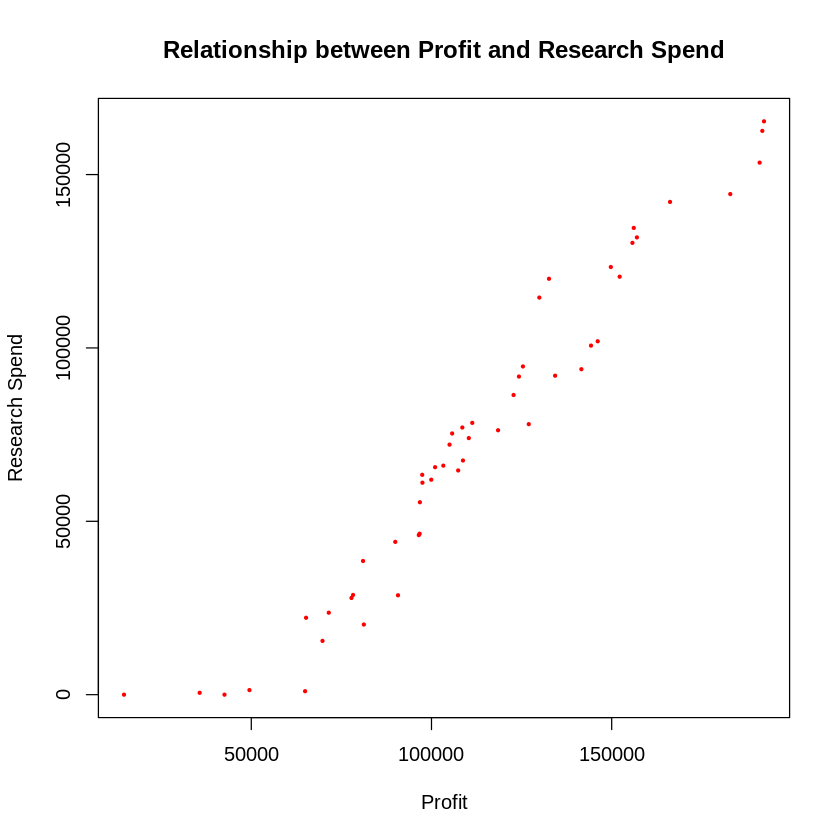

In [2]:
# Visualizing the data

plot(dataset[["Profit"]],
     dataset[["R.D.Spend"]],
     col="red",
     xlab="Profit",
     ylab="Research Spend",
     main="Relationship between Profit and Research Spend",
     cex=0.5,
     pch=20)

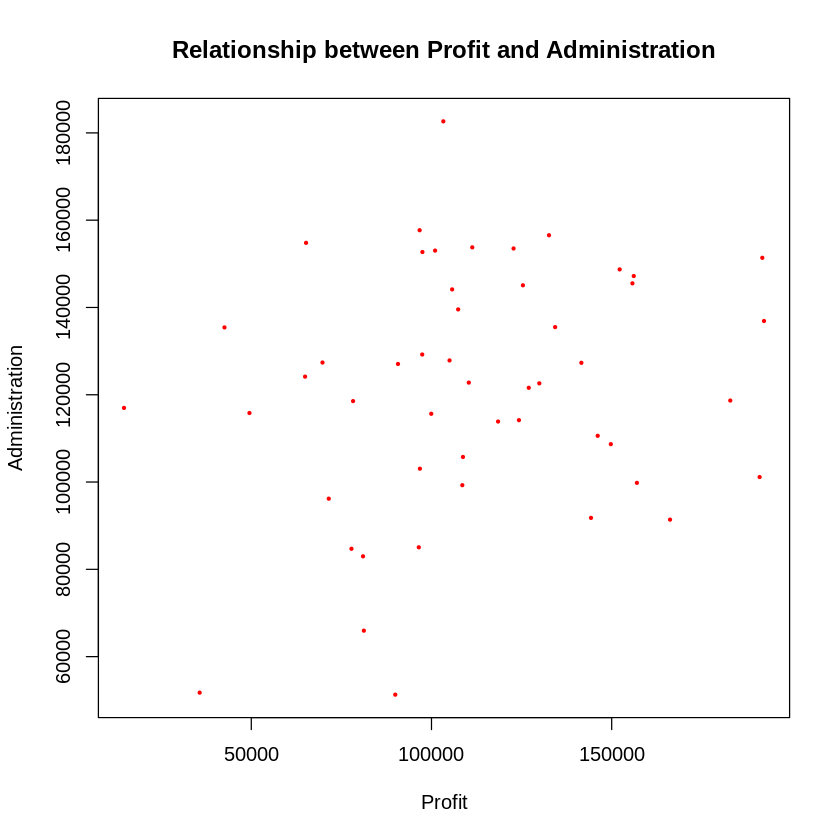

In [3]:
plot(dataset[["Profit"]],
     dataset[["Administration"]],
     col="red",
     xlab="Profit",
     ylab="Administration",
     main="Relationship between Profit and Administration",
     cex=0.5,
     pch=20)

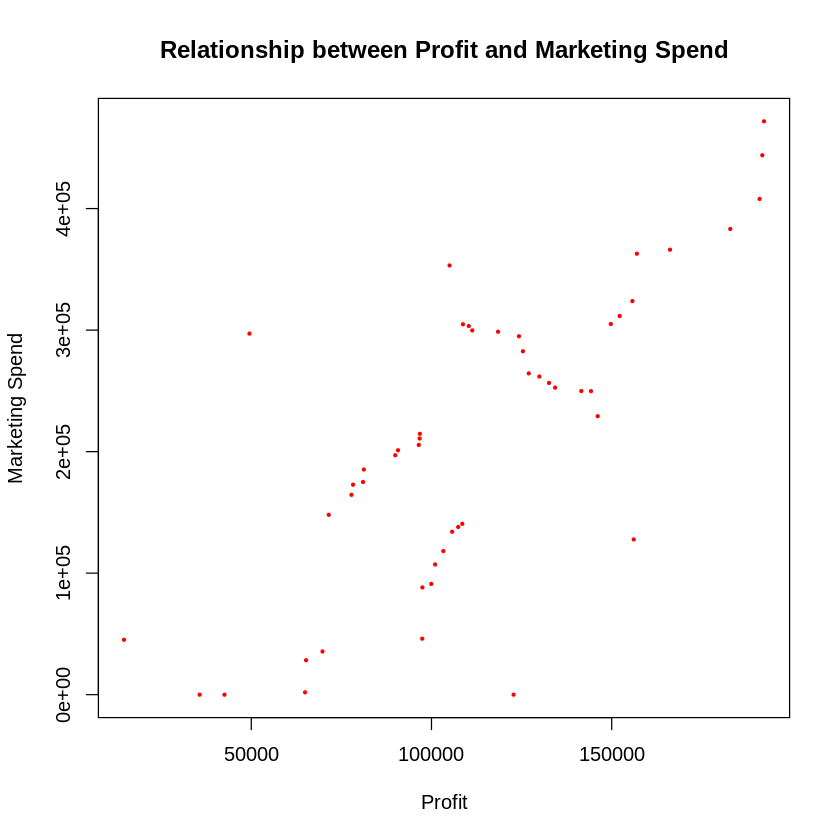

In [4]:
plot(dataset[["Profit"]],
     dataset[["Marketing.Spend"]],
     col="red",
     xlab="Profit",
     ylab="Marketing Spend",
     main="Relationship between Profit and Marketing Spend",
     cex=0.5,
     pch=20)

In [5]:
# encode the column with categorical values i.e. the State column

dataset[["State"]] = factor(dataset[["State"]],
                            levels=c("New York","California", "Florida"),
                            labels=c(1,2,3))

In [6]:
# split the dataset into the train and test set

install.packages("caTools")
library(caTools)
set.seed(123)
split = sample.split(dataset[["Profit"]], SplitRatio=0.8)
training_set = subset(dataset, split==TRUE)
test_set = subset(dataset, split==FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [7]:
View(training_set)

,R.D.Spend,Administration,Marketing.Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,165349.20,136897.80,471784.10,1,192261.83
2,162597.70,151377.59,443898.53,2,191792.06
3,153441.51,101145.55,407934.54,3,191050.39
6,131876.90,99814.71,362861.36,1,156991.12
7,134615.46,147198.87,127716.82,2,156122.51
9,120542.52,148718.95,311613.29,1,152211.77
10,123334.88,108679.17,304981.62,2,149759.96
12,100671.96,91790.61,249744.55,2,144259.40
13,93863.75,127320.38,249839.44,3,141585.52


In [8]:
View(test_set)

,R.D.Spend,Administration,Marketing.Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
4,144372.41,118671.85,383199.62,1,182901.99
5,142107.34,91391.77,366168.42,3,166187.94
8,130298.13,145530.06,323876.68,3,155752.60
11,101913.08,110594.11,229160.95,3,146121.95
16,114523.61,122616.84,261776.23,1,129917.04
20,86419.70,153514.11,0.00,1,122776.86
21,76253.86,113867.30,298664.47,2,118474.03
24,67532.53,105751.03,304768.73,3,108733.99
31,61994.48,115641.28,91131.24,3,99937.59


In [9]:
# build the multiple linear regression model

regressor = lm(formula=Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
                data=training_set)

In [10]:
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


In [11]:
# predict the results with new/unseen data

y_pred = predict(regressor, newdata = test_set)

In [12]:
View(y_pred)

4         5         8        11        16        20        21        24 
173981.09 172655.64 160250.02 135513.90 146059.36 114151.03 117081.62 110671.31 
       31        32 
 98975.29  96867.03

In [13]:
# Backward Elimination

regressor_2 = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend,
                 data = training_set)

In [14]:
summary(regressor_2)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33117  -4858    -36   6020  17957 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.970e+04  7.120e+03   6.980 3.48e-08 ***
R.D.Spend        7.983e-01  5.356e-02  14.905  < 2e-16 ***
Administration  -2.895e-02  5.603e-02  -0.517    0.609    
Marketing.Spend  3.283e-02  1.987e-02   1.652    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9629 on 36 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9457 
F-statistic: 227.6 on 3 and 36 DF,  p-value: < 2.2e-16


In [15]:
# Administration is the next highest statistically insignificant independent variable - P = 0.609

regressor_3 = lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
                 data = training_set)

In [16]:
summary(regressor_3)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33294  -4763   -354   6351  17693 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.638e+04  3.019e+03  15.364   <2e-16 ***
R.D.Spend       7.879e-01  4.916e-02  16.026   <2e-16 ***
Marketing.Spend 3.538e-02  1.905e-02   1.857   0.0713 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9533 on 37 degrees of freedom
Multiple R-squared:  0.9495,	Adjusted R-squared:  0.9468 
F-statistic: 348.1 on 2 and 37 DF,  p-value: < 2.2e-16
